In [ ]:
# Mount with Google Drive via Google Collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Sastrawi
!pip install stanza

     |████████████████████████████████| 215kB 2.5MB/s 
     |████████████████████████████████| 235kB 2.8MB/s 


In [ ]:
# Import modules
import os
import re
import nltk
import stanza
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stanza.download('id')
nltk.download('punkt')
nltk.download('stopwords')
stopwords_nltk =  set(stopwords.words('indonesian'))

2020-10-22 08:54:46 INFO: Downloading default packages for language: id (Indonesian)...
2020-10-22 08:58:17 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# cd to project directory in Google Drive
os.chdir("/content/drive/My Drive/Kuliah/Peminatan/IR/Tugas/Tugas 2")

# A. Edit Distance

Tidak boleh library apapun

1. Buatlah sebuah fungsi yang bernama “edit_distance”. Fungsi tersebut menerima 2 parameter berupa string (string_1, string_2). Implementasikan algoritma Levenshtein Distance pada fungsi tersebut. Fungsi tersebut nantinya akan mengembalikan nilai terkecil yang dibutuhkan untuk mentransformasi string_1 menjadi string_2.

In [ ]:
def edit_distance(string_1, string_2):
    """
    Fungsi dibuat berdasarkan algoritma Levenshtein Distance dengan Dynamic Programming.
    Akan membuat distance matrix yang elemennya mengindikasikan cost yang dibutuhkan dari 
    substring kata 2 hingga panjang row dan substring kata 1 hingga panjang column

    string_1: kata 1 yang dibandingkan
    string_2: kata 2 yang dibandingkan
    return keseluruhan cost (elemen terakhir distance matrix) 
    """
    
    # Membuat matriks inisialisasi
    mat = [[0 for i in range(len(string_1) + 1)] for j in range(len(string_2) + 1)]
    
    for i in range(len(string_1) + 1):
        mat[0][i] = i

    for i in range(len(string_2) + 1):
        mat[i][0] = i

    # Membuat distance matrix
    for r in range(1, len(string_2) + 1):
        for c in range(1, len(string_1) + 1):
            # Jika karakter dari string sama, maka tidak ada perubahan yang dilakukan
            # ambil nilai dari distance sebelumnya
            if string_2[r-1] == string_1[c-1]:
                mat[r][c] = mat[r-1][c-1]
            else:
                val = min(mat[r-1][c], mat[r][c-1], mat[r-1][c-1])
                mat[r][c] = val + 1

    # Mengecek kebenaran dari distance matriks
    # print_mat(mat)

    return mat[r][c]

def print_mat(mat):
    for row in mat:
        print(row)

2. Menggunakan fungsi yang telah dibuat pada soal sebelumnya, carilah nilai edit_distance dari pasangan kata berikut ini:

a. keberimbangan - keberanian

b. keberimbangan - keberangkatan

In [ ]:
# a. keberimbangan - keberanian
string_1, string_2 = "keberimbangan", "keberanian"
print("%s - %s" % (string_1, string_2))
print("Minimum edit distance:", edit_distance(string_1, string_2))
print()

# b. keberimbangan - keberangkatan
string_1, string_2 = "keberimbangan", "keberangkatan"
print("%s - %s" % (string_1, string_2))
print("Minimum edit distance:", edit_distance(string_1, string_2))

keberimbangan - keberanian
Minimum edit distance: 4

keberimbangan - keberangkatan
Minimum edit distance: 6


# B. Text-Processing

Diperbolehkan menggunakan library nltk (stopwords), sastrawi (stemming), dan stanza (lemmatization)

In [ ]:
korpus = pd.read_json('korpus_berita_update.json')
korpus.set_index('id', inplace=True)
korpus.head()

,content
id,
0,PDI Perjuangan (PDIP) Surabaya melaporkan temu...
1,PT Telkom Indonesia bekerja sama dengan PDAM K...
2,Pengurus Besar Ikatan Dokter Indonesia (IDI) m...
3,Arkeolog Institut Antropologi dan Sejarah Nasi...
4,Maverick Vinales harus meraih kemenangan di Mo...


## Pre-processing

- Untuk setiap berita yang terdapat pada korpus, terapkan case folding. Case folding mentransformasi semua karakter ke dalam format lowercase.
- Hilangkan karakter berupa angka, whitespace, dan tanda baca (‘!@#$%^&*()-_+=?/>.<,|\~`’)

In [ ]:
# lowercase
korpus['content'] = korpus['content'].str.lower()
korpus.head()

,content
id,
0,pdi perjuangan (pdip) surabaya melaporkan temu...
1,pt telkom indonesia bekerja sama dengan pdam k...
2,pengurus besar ikatan dokter indonesia (idi) m...
3,arkeolog institut antropologi dan sejarah nasi...
4,maverick vinales harus meraih kemenangan di mo...


In [ ]:
# characters removal (self-defined pattern removal)
# Karakter direplace dengan spasi (' ') dikarenakan untuk menghindari perubahan 
# seperti "partai-partai" menjadi "partaipartai"
korpus['content'] = korpus['content'].str.replace("[0-9''\"!@#$%^&*()-_+=?/>.<,|~`\n\t\r]", ' ')
korpus.head()

,content
id,
0,pdi perjuangan pdip surabaya melaporkan temu...
1,pt telkom indonesia bekerja sama dengan pdam k...
2,pengurus besar ikatan dokter indonesia idi m...
3,arkeolog institut antropologi dan sejarah nasi...
4,maverick vinales harus meraih kemenangan di mo...


## Tokenisasi & Stopwords

- Lakukan tokenization pada masing-masing berita dan tampilkan list of token (hasil tokenisasi) dari 5 berita pertama.
- Untuk masing-masing berita, temukan token yang tergolong stopwords lalu hilangkan dari list of tokens.

In [ ]:
# Tokenisasi & stopwords, one-shot (hope it's okay)
korpus['content'] = [nltk.word_tokenize(content) for content in korpus['content'] if content not in stopwords_nltk]

# 5 berita pertama
korpus.head()

,content
id,
0,"[pdi, perjuangan, pdip, surabaya, melaporkan, ..."
1,"[pt, telkom, indonesia, bekerja, sama, dengan,..."
2,"[pengurus, besar, ikatan, dokter, indonesia, i..."
3,"[arkeolog, institut, antropologi, dan, sejarah..."
4,"[maverick, vinales, harus, meraih, kemenangan,..."


## Stemming

Menggunakan hasil yang didapat dari soal 2, lakukan stemming untuk masing-masing token pada setiap list of tokens. Selanjutnya, tampilkan list of tokens dari 5 berita pertama.

In [ ]:
# Stemming menggunakan library sastrawi
STEMMING_FACTORY = StemmerFactory()
stemmer = STEMMING_FACTORY.create_stemmer()

stemmed = []
for i, row in korpus.iterrows():
    new_token = []
    for token in row['content']:
        new_token.append(stemmer.stem(token))
    stemmed.append(new_token)

korpus['content_stem'] = stemmed

# 5 berita pertama
korpus.head()

,content,content_stem
id,,
0,"[pdi, perjuangan, pdip, surabaya, melaporkan, ...","[pdi, juang, pdip, surabaya, lapor, temu, stik..."
1,"[pt, telkom, indonesia, bekerja, sama, dengan,...","[pt, telkom, indonesia, kerja, sama, dengan, p..."
2,"[pengurus, besar, ikatan, dokter, indonesia, i...","[urus, besar, ikat, dokter, indonesia, idi, pa..."
3,"[arkeolog, institut, antropologi, dan, sejarah...","[arkeolog, institut, antropologi, dan, sejarah..."
4,"[maverick, vinales, harus, meraih, kemenangan,...","[maverick, vinales, harus, raih, menang, di, m..."


## Lemmatization

In [ ]:
lem = stanza.Pipeline('id', processors= 'tokenize,lemma')

lemma = []
for i, row in korpus.iterrows():
    # Detokenize untuk melakukan proses pada stanza
    doc = lem(' '.join(row['content']))
    lemma.append([word.lemma for sent in doc.sentences for word in sent.words])

korpus['content_lemma'] = lemma

# 5 berita pertama
korpus.head()

2020-10-22 09:01:35 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| lemma     | gsd     |

2020-10-22 09:01:35 INFO: Use device: cpu
2020-10-22 09:01:35 INFO: Loading: tokenize
2020-10-22 09:01:35 INFO: Loading: lemma
2020-10-22 09:01:35 INFO: Done loading processors!


,content,content_stem,content_lemma
id,,,
0,"[pdi, perjuangan, pdip, surabaya, melaporkan, ...","[pdi, juang, pdip, surabaya, lapor, temu, stik...","[pdi, perjuangan, pdip, surabaya, menlaporkan,..."
1,"[pt, telkom, indonesia, bekerja, sama, dengan,...","[pt, telkom, indonesia, kerja, sama, dengan, p...","[pt, telkom, indonesia, bekerja, sama, dengan,..."
2,"[pengurus, besar, ikatan, dokter, indonesia, i...","[urus, besar, ikat, dokter, indonesia, idi, pa...","[penkurus, besar, ikatan, dokter, indonesia, i..."
3,"[arkeolog, institut, antropologi, dan, sejarah...","[arkeolog, institut, antropologi, dan, sejarah...","[arkeolog, institut, antropologi, dan, sejarah..."
4,"[maverick, vinales, harus, meraih, kemenangan,...","[maverick, vinales, harus, raih, menang, di, m...","[maverick, vinales, harus, menraih, kemenangan..."


# C.Word Vector

## C1. TF-IDF

Diperbolehkan library numpy dan pandas

1. Carilah representasi tf-idf dari setiap berita. Gunakan list of tokens yang sudah dilematisasi pada soal sebelumnya.

In [ ]:
# Menghitung tf
tf_dict = {}

for i, row in enumerate(korpus['content_lemma']):
    for word in row:
        if word not in tf_dict:
            tf_dict[word] = np.zeros((korpus.shape[0]))

        tf_dict[word][i] += 1

tfidf = pd.DataFrame(tf_dict).T
tfidf.columns = korpus.index
tfidf.head()

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
pdi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
perjuangan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
pdip,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
surabaya,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
menlaporkan,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Menghitung idf
tfidf["df"] = tfidf.sum(axis = 1)
tfidf["idf"] = np.log(len(korpus) / tfidf.df)
tfidf.head()

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,df,idf
pdi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.302585
perjuangan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,5.0,1.791759
pdip,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,0.916291
surabaya,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.203973
menlaporkan,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.014903


In [ ]:
# Membuat representasi idf kataxdokumen
id_w = ["w"+str(i+1) for i in range(len(korpus))]
id_doc = [i for i in range(len(korpus))]

tfidf[id_w] = (tfidf[id_doc].values.T * tfidf.idf.values).T
tfidf.head()

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,df,idf,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30
pdi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.302585,2.302585,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.605170,0.0,0.000000
perjuangan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,5.0,1.791759,1.791759,0.0,1.791759,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.583519,0.0,1.791759
pdip,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,0.916291,8.246617,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.916291,0.0,0.000000
surabaya,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.203973,10.835755,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
menlaporkan,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.014903,4.029806,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.014903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.014903,0.000000,0.0,0.000000


Setelah itu hitunglah L2 norm masing-masing berita. Dokumen dengan “id” berapakah yang memiliki L2 norm paling besar ? Berapa nilai L2 norm dari berita tersebut ?

In [ ]:
# Mengambil representasi tfidf
tfidf_w = tfidf[id_w].T
tfidf_w.head()

,pdi,perjuangan,pdip,surabaya,menlaporkan,temuan,stiker,berisi,hasutan,dan,provokasi,bergambar,bakal,calon,wali,kota,eri,cahyadi,wakil,dua,periode,wishnu,sakti,buana,ke,polisi,bawaslu,itu,dinilai,menprovokasi,sebab,whisnu,digambarkan,sedang,duduk,di,punggung,banteng,sementara,sebelah,...,habiburokhman,bersamaan,pencatatan,ahu,ah,terdiri,ditunjuk,pak,prabowo,gerindraprabowo,subianto,konsolidasi,mensusun,tangga,art,segala,perselisihan,internal,menkedepankan,mentindak,manuver,perorangan,perseorangan,dianggap,kongres,biasa,sufmi,dasco,harian,mengantikan,laksdya,purn,moekhlas,sidik,arief,poyuono,buruh,ketenagakerjaan,menlontarkan,kontroversial
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
w1,2.302585,1.791759,8.246617,10.835755,4.029806,5.4161,10.574047,3.401197,6.907755,-22.149920,3.401197,3.401197,2.014903,2.910574,8.958797,6.591674,6.907755,6.907755,1.321756,1.135968,1.455287,3.401197,6.907755,6.907755,-2.043302,1.003302,4.60517,-9.986959,2.70805,3.401197,2.302585,5.4161,3.401197,2.014903,5.4161,-10.750557,3.401197,6.907755,0.356675,3.401197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-14.766614,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.00000,-1.109662,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,-19.709354,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w3,0.000000,1.791759,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-9.229133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.321756,0.000000,0.000000,0.000000,0.000000,0.000000,-1.021651,0.000000,0.00000,-6.657973,0.00000,0.000000,2.302585,0.0000,0.000000,0.000000,0.0000,-14.334076,0.000000,0.000000,0.356675,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-23.995747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567984,0.000000,0.000000,0.000000,0.000000,-1.021651,0.000000,0.00000,-6.657973,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,-21.501114,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-7.383307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567984,0.000000,0.000000,0.000000,0.000000,-0.510826,0.000000,0.00000,-4.438648,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,-19.709354,0.000000,0.000000,0.713350,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menghitung norm
tfidf_w['norm'] = np.linalg.norm(tfidf_w.values, axis=1)
tfidf_w.head()

,pdi,perjuangan,pdip,surabaya,menlaporkan,temuan,stiker,berisi,hasutan,dan,provokasi,bergambar,bakal,calon,wali,kota,eri,cahyadi,wakil,dua,periode,wishnu,sakti,buana,ke,polisi,bawaslu,itu,dinilai,menprovokasi,sebab,whisnu,digambarkan,sedang,duduk,di,punggung,banteng,sementara,sebelah,...,bersamaan,pencatatan,ahu,ah,terdiri,ditunjuk,pak,prabowo,gerindraprabowo,subianto,konsolidasi,mensusun,tangga,art,segala,perselisihan,internal,menkedepankan,mentindak,manuver,perorangan,perseorangan,dianggap,kongres,biasa,sufmi,dasco,harian,mengantikan,laksdya,purn,moekhlas,sidik,arief,poyuono,buruh,ketenagakerjaan,menlontarkan,kontroversial,norm
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
w1,2.302585,1.791759,8.246617,10.835755,4.029806,5.4161,10.574047,3.401197,6.907755,-22.149920,3.401197,3.401197,2.014903,2.910574,8.958797,6.591674,6.907755,6.907755,1.321756,1.135968,1.455287,3.401197,6.907755,6.907755,-2.043302,1.003302,4.60517,-9.986959,2.70805,3.401197,2.302585,5.4161,3.401197,2.014903,5.4161,-10.750557,3.401197,6.907755,0.356675,3.401197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.609892
w2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-14.766614,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.00000,-1.109662,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,-19.709354,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.162291
w3,0.000000,1.791759,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-9.229133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.321756,0.000000,0.000000,0.000000,0.000000,0.000000,-1.021651,0.000000,0.00000,-6.657973,0.00000,0.000000,2.302585,0.0000,0.000000,0.000000,0.0000,-14.334076,0.000000,0.000000,0.356675,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.069839
w4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-23.995747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567984,0.000000,0.000000,0.000000,0.000000,-1.021651,0.000000,0.00000,-6.657973,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,-21.501114,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.661062
w5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-7.383307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567984,0.000000,0.000000,0.000000,0.000000,-0.510826,0.000000,0.00000,-4.438648,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,-19.709354,0.000000,0.000000,0.713350,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.539359


In [ ]:
id_max = tfidf_w['norm'].argmax()
print("Dokumen dengan id %s memiliki L2 Norm terbesar dengan norm sebesar %d" % (id_max, tfidf_w['norm'][id_max]))

Dokumen dengan id 7 memiliki L2 Norm terbesar dengan norm sebesar 77


## C2. Word2Vec

1. Menggunakan list of tokens yang sudah dilematisasi, Buatlah sebuah model word2vec dengan menggunakan library yang disediakan oleh gensim dengan ketentuan sebagai berikut:
- ukuran dimensi word2vec yang dihasilkan adalah 2
- Teman-teman dibebaskan untuk menggunakan model skip-gram ataupun CBOW.
- pilih jumlah iterasi / epoch sebesar 10.
- untuk parameter lainnya, teman-teman dibebaskan untuk memilih nilainya sendiri.


In [ ]:
model = Word2Vec(min_count=1, size=2, sg=1)
print("=======================Sebelum training: ", model)

model.build_vocab(korpus.content_lemma.values)
print("=======================Build vocal: ", model)

model.train(korpus.content_lemma.values, total_words=len(korpus.content_lemma.values), epochs=10)
print("=======================Sesudah training: ", model)

=======================Sebelum training:  Word2Vec(vocab=0, size=2, alpha=0.025)
=======================Build vocal:  Word2Vec(vocab=2516, size=2, alpha=0.025)
=======================Sesudah training:  Word2Vec(vocab=2516, size=2, alpha=0.025)


2. Simpan model yang word2vec yang sudah dilatih dengan nama file “word2vec.model”. Kumpulkan model yang sudah dilatih

In [ ]:
# Deprecated method, but let's use this anyway
model.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


3. Gunakan model yang sudah disimpan pada soal 2 untuk mencari representasi word2vec dari term berikut ini:
- air
- domba

In [ ]:
query = ['air', 'domba']

In [ ]:
for q in query:
    print("Representasi embeddings untuk %s:\n%s" % (q, model.wv[q]))

Representasi embeddings untuk air:
[-0.8561466  1.1876738]
Representasi embeddings untuk domba:
[-0.57195264  0.8707772 ]


4. Plot nilai vektor dari kedua term yang teman-teman dapatkan (soal nomor 3) dalam format 2D-euclidean space. (Teman-teman tidak perlu melakukan reduksi dimensi mengingat dimensionalitas dari model word2vec sudah bernilai 2). Gambar berikut ini merupakan contoh plotting yang diharapkan.

In [ ]:
def plot(labels, we2d):
    x_coords = we2d[:,0]
    y_coords = we2d[:,1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.title('Word Vector Representation in 2D')
    plt.xlim(x_coords.min()-0.1, x_coords.max()+0.1)
    plt.ylim(y_coords.min()-0.1, y_coords.max()+0.1)
    plt.show()

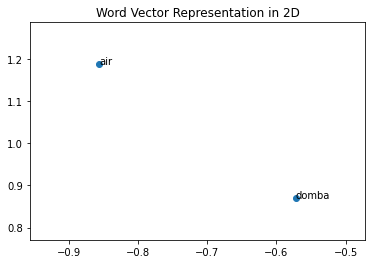

In [ ]:
plot(query, model.wv[query])

5. BONUS: Teman-teman dapat menggunakan pretrained model word2vec yang sudah dilatih menggunakan korpus wikipedia bahasa Indonesia. Setelah berhasil me-load model tersebut, teman-teman dapat mencoba menggunakan model tersebut untuk melakukan plotting terhadap kedua term pada soal 3. Coba ceritakan perbedaan apa yang teman-teman dapatkan?

In [ ]:
# Get the pre-trained model in the same directory
!unzip word2vec_id/idwiki_word2vec_100.zip -d idwiki_word2vec_100

Archive:  word2vec_id/idwiki_word2vec_100.zip
replace idwiki_word2vec_100/idwiki_word2vec_100.model.wv.vectors.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace idwiki_word2vec_100/idwiki_word2vec_100.model.trainables.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace idwiki_word2vec_100/idwiki_word2vec_100.model? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# Load pre-trained model
path = 'idwiki_word2vec_100/idwiki_word2vec_100.model'
model_wiki = Word2Vec.load(path)
print(model_wiki)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Word2Vec(vocab=331792, size=100, alpha=0.025)


### Sebelum Fine-Tuning

In [ ]:
for q in query:
    print("Representasi embeddings untuk %s:\n%s" % (q, model_wiki.wv[q]))

Representasi embeddings untuk air:
[ 1.1182116   2.0618398   4.6943107  -3.0221236  -3.0409517  -1.3017954
 -0.1518118   0.13858771 -5.1806192  -3.3212721  -2.6593297  -2.820464
 -0.19154048  1.2529339   0.04585536 -0.4204929  -2.4444304  -0.24363165
 -2.1219554   0.7750365  -1.9082646  -1.6997186  -2.6488647   0.6190252
  1.1875762   0.39339882  0.73452526  3.898938    0.62330574 -0.2374445
 -2.7022698   2.8772182   1.1284477   2.6250114   0.9985549   0.3989209
  0.41675785  0.9942736  -0.8722747   1.537012    0.18052767  1.4157465
  0.7150478   1.394026   -0.74916154 -3.2102213   4.7712984  -1.8034359
 -1.2651821  -2.870329   -0.68456715  0.77286124  4.3746524   0.76799995
 -0.753567    0.6433416  -2.209096    1.0424085   1.6567421  -1.9987116
 -2.388335    0.44237438 -2.4156995   0.6119867   1.5766355  -2.2951465
 -1.1237025   1.1305083   5.244729   -1.6946838   1.5028305   2.7222772
 -0.61096793 -3.2492864  -3.5154717  -2.4917233  -2.4020755  -0.68886733
  0.35437936  2.0067034   0

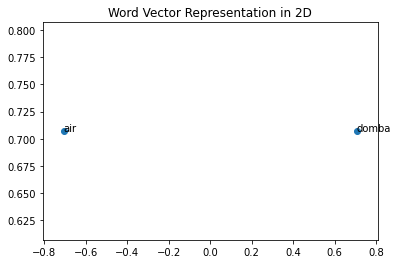

In [ ]:
from sklearn.decomposition import PCA

# Melakukan dimensionality reduction untuk mengambil 2 dimensi representasi
pca = PCA(n_components=2, copy=False, whiten=True)
new_rep = pca.fit_transform(model_wiki.wv[query])

plot(query, new_rep)

### Setelah Fine-Tuning

In [ ]:
# Fine-tuning
model_wiki.build_vocab(korpus.content_lemma.values, update=True)
print("=======================Build new vocab: ", model_wiki)

model_wiki.train(korpus.content_lemma.values, total_words=len(korpus.content_lemma.values), epochs=10)
print("=======================Sesudah fine tuning: ", model_wiki)

=======================Build new vocab:  Word2Vec(vocab=331827, size=100, alpha=0.025)
=======================Sesudah fine tuning:  Word2Vec(vocab=331827, size=100, alpha=0.025)


In [ ]:
for q in query:
    print("Representasi embeddings untuk %s:\n%s" % (q, model_wiki.wv[q]))

Representasi embeddings untuk air:
[ 1.1487387   1.9388593   4.767095   -3.0318644  -2.9518948  -1.2477789
 -0.19169319  0.1036846  -5.0771484  -3.3035157  -2.6512823  -2.8770437
 -0.1932897   1.2955903  -0.12482281 -0.5208494  -2.4462605  -0.23707284
 -2.047409    0.871871   -1.926557   -1.7588018  -2.5495086   0.7716161
  1.0582312   0.44538215  0.77583104  3.8828177   0.6837198  -0.28099442
 -2.7741287   2.9931953   1.2535634   2.714713    0.9705094   0.35821003
  0.4532954   1.0413582  -0.9142693   1.5082719   0.25052282  1.4484212
  0.6988699   1.3089298  -0.7130386  -3.247359    4.9127493  -1.7785088
 -1.2381095  -2.9747255  -0.65691316  0.62543714  4.392783    0.80943555
 -0.7851      0.5555954  -2.1907997   1.0623422   1.797002   -1.9159551
 -2.4785879   0.3157006  -2.466536    0.6270632   1.4898984  -2.4381752
 -1.0772364   1.1684664   5.26988    -1.7490476   1.478742    2.6783895
 -0.5666822  -3.2676163  -3.6001754  -2.5461476  -2.4376347  -0.74757355
  0.48439252  1.9076781 

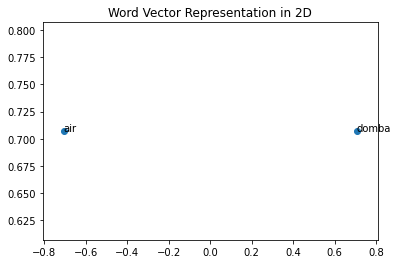

In [ ]:
from sklearn.decomposition import PCA

# Melakukan dimensionality reduction untuk mengambil 2 dimensi representasi
pca = PCA(n_components=2, copy=False, whiten=True)
new_rep = pca.fit_transform(model_wiki.wv[query])

plot(query, new_rep)

In [ ]:
"""
Perbedaan dari pre-trained dan model sebelumnya bisa dilihat terletak pada
1. Dimensi dari word embeddings, dimana pada pre-trained lebih besar yaitu 100.
2. Dikarenakan database yang lebih besar, vocabulary yang tersedia pada pre-trained lebih banyak yaitu 331827.
3. Pada hasil visualisasi domba dan air, terdapat perbedaan representasi.

Word vector pada pre-trained model menggambarkan domba dan air dengan jauh (tidak terlalu similar), hal ini
bisa disebabkan karena 2D dimensi hasil PCA kehilangan banyak representasi atau memang domba dan air tidak banyak
berkaitan berdasarkan dataset training yang diberikan.
"""

'\nPerbedaan dari pre-trained dan model sebelumnya bisa dilihat terletak pada\n1. Dimensi dari word embeddings, dimana pada pre-trained lebih besar yaitu 100.\n2. Dikarenakan database yang lebih besar, vocabulary yang tersedia pada pre-trained lebih banyak yaitu 331827.\n3. Pada hasil visualisasi domba dan air, terdapat perbedaan representasi.\n\nWord vector pada pre-trained model menggambarkan domba dan air dengan jauh (tidak terlalu similar), hal ini\nbisa disebabkan karena 2D dimensi hasil PCA kehilangan banyak representasi atau memang domba dan air tidak banyak\nberkaitan berdasarkan dataset training yang diberikan.\n'

## C3. GloVe

1. Apa perbedaan antara metode word2vec dan GloVe ?

In [ ]:
"""
Letak perbedaan utama adalah pada konsiderasi frekuensi kemunculan suatu kata pada saat melakukan training.
Pada word2vec, co-occurance dari suatu kata hanya dipertimbangkan pada konteks lokal kata, 
yaitu hanya pada kata yang bersebelahan.
Pada GLoVe, konsiderasi co-occurance dari kata didasarkan atas konteks global (global statistik), dari keseluruhan korpus.
GloVe dikenal sebagai "count-based" model.

Dari segi teknik yang digunakan pada saat training, GloVe dan word2vec juga memiliki cara yang berbeda.
Word2vec memanfaatkan feed forward neural network sederhana untuk memprediksi vector yang tepat dalam
merepresentasikan suatu kata.
GloVe menggunakan pendekatan faktorisasi matriks words-contexts (menyediakan informasi co-occurence dalam korpus).
matriks ini kemudian difaktorisasi menjadi words-features x features-contexts.
"""

'\nLetak perbedaan utama adalah pada konsiderasi frekuensi kemunculan suatu kata pada saat melakukan training.\nPada word2vec, co-occurance dari suatu kata hanya dipertimbangkan pada konteks lokal kata, \nyaitu hanya pada kata yang bersebelahan.\nPada GLoVe, konsiderasi co-occurance dari kata didasarkan atas konteks global (global statistik), dari keseluruhan korpus.\nGloVe dikenal sebagai "count-based" model.\n\nDari segi teknik yang digunakan pada saat training, GloVe dan word2vec juga memiliki cara yang berbeda.\nWord2vec memanfaatkan feed forward neural network sederhana untuk memprediksi vector yang tepat dalam\nmerepresentasikan suatu kata.\nGloVe menggunakan pendekatan faktorisasi matriks words-contexts (menyediakan informasi co-occurence dalam korpus).\nmatriks ini kemudian difaktorisasi menjadi words-features x features-contexts.\n'

2. Misalkan diberikan 2 korpus:

korpus 1 : “Saya mengerjakan tugas perolehan informasi”

korpus 2 : “Saya mengambil kuliah perolehan informasi”

Bentuk lah matriks co-occurence berdasarkan 2 korpus tersebut, dengan ketentuan
sebagai berikut:
- Gunakan setiap term yang ada pada korpus. Teman-teman tidak perlu melakukan preprocessing seperti word removal, stemming, lemmatization, dll.
- Gunakan satu term di sebelah kanan dan satu term di sebelah kiri sebagai
konteks kemunculannya untuk setiap term yang akan dicari nilai co-occurencenya. Sebagai contoh, misalkan terdapat korpus “informasi perolehan informasi”, maka nilai co-occurence term “perolehan”-“informasi” bernilai 2 (satu term setelah dan satu term sebelum term “perolehan” adalah “informasi”), begitu pula dengan co-occurence “informasi”-”perolehan” karena bersifat simetris.

In [ ]:
# Korpus
korpus_glove = {
    "korpus-1": "Saya mengerjakan tugas perolehan informasi",
    "korpus-2": "Saya mengambil kuliah perolehan informasi"
}

In [ ]:
# Mendapatkan kata unik
words = ' '.join(korpus_glove.values()).split()
unique_word = list(dict.fromkeys(words))
unique_word

# Membuat matriks dalam dataframe
# Lebih ringan dan mudah dengan array tapi untuk lebih intuitif digunakan dataframe
cooc_mat = pd.DataFrame(np.zeros((len(unique_word), len(unique_word))), index=unique_word, columns=unique_word)
cooc_mat

,Saya,mengerjakan,tugas,perolehan,informasi,mengambil,kuliah
Saya,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mengerjakan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tugas,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perolehan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
informasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mengambil,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kuliah,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menghitung co-occurrence matriks
tokens = [row.split() for row in korpus_glove.values()]
freq = {}
for i in range(len(korpus_glove)):
    token = tokens[i]
    for j in range(len(token)):
        if j != len(token) - 1:
            cooc_mat[token[j]][token[j+1]] += 1
            cooc_mat[token[j+1]][token[j]] += 1
        
        if token[j] not in freq:
            freq[token[j]] = 1
        else:
            freq[token[j]] += 1

cooc_mat

,Saya,mengerjakan,tugas,perolehan,informasi,mengambil,kuliah
Saya,0.0,1.0,0.0,0.0,0.0,1.0,0.0
mengerjakan,1.0,0.0,1.0,0.0,0.0,0.0,0.0
tugas,0.0,1.0,0.0,1.0,0.0,0.0,0.0
perolehan,0.0,0.0,1.0,0.0,2.0,0.0,1.0
informasi,0.0,0.0,0.0,2.0,0.0,0.0,0.0
mengambil,1.0,0.0,0.0,0.0,0.0,0.0,1.0
kuliah,0.0,0.0,0.0,1.0,0.0,1.0,0.0


3. Berdasarkan matriks co-occurence yang sudah dibuat pada soal nomor 2, carilah nilai P-(i,j) untuk setiap i dan j berikut:
- i = “informasi” dan j = “perolehan”
- i = “tugas” dan j = “perolehan”


In [ ]:
# Probabilitas kemunculan i = "informasi" dan j = "perolehan"
xij1 = cooc_mat['informasi']['perolehan']
xi1 = freq['informasi']
pij1 = xij1/xi1
print("Probabilitas kemunculan term informasi dan perolehan bersamaan adalah", pij1)

# Probabilitas kemunculan i = "tugas" dan j = "perolehan"
xij2 = cooc_mat['tugas']['perolehan']
xi2 = freq['tugas']
pij2 = xij2/xi2
print("Probabilitas kemunculan term tugas dan perolehan bersamaan adalah", pij2)

Probabilitas kemunculan term informasi dan perolehan bersamaan adalah 1.0
Probabilitas kemunculan term tugas dan perolehan bersamaan adalah 1.0


4. Carilah perbandingan P(i,j) pada nomor 3. Berdasarkan nilai tersebut, apa yang teman-teman dapat simpulkan mengenai relevansi antara term-term “informasi-perolehan” dan “tugas-perolehan” ?

In [ ]:
print("Perbandingan P(informasi, perolehan) dan P(tugas, perolehan) adalah", pij1/pij2)

Perbandingan P(informasi, perolehan) dan P(tugas, perolehan) adalah 1.0


In [ ]:
"""
Perbandingan dari kedua probabilitas term adalah 1. Sulit untuk menjelaskan representasi perbandingan ini,
karena bisa jadi perbandingan mengindikasikan bahwa term perolehan relevan dengan term informasi dan tugas maupun tidak.
Namun, dari intuisi saya sepertinya pada kasus ini, term perolehan bisa kita katakan relevan dengan kedua term informasi maupun tugas.
Hal ini karena probabilitas yang tinggi pada kemunculan mereka. 
"""

'\nPerbandingan dari kedua probabilitas term adalah 1. Sulit untuk menjelaskan representasi perbandingan ini,\nkarena bisa jadi perbandingan mengindikasikan bahwa term perolehan relevan dengan term informasi dan tugas relevan maupun tidak.\nNamun, dari intuisi saya sepertinya pada kasus ini, term perolehan bisa kita katakan relevan denga  kedua term informasi maupun tugas.\nHal ini karena probabilitas yang tinggi pada kemunculan mereka. \n'